<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Crime and commercial activities in Toronto neighborhoods</font></h1>

This notebook will be used for the Capstone project of IBM Applied Data Science courses (via coursera)

## Executive summary
In this project, we intend to study the relationship between crime rate/types and commercial activities in Toronto neighborhoods. In particular, we want to inspect the relationship/association between certain commercial activities in a neighbourhood, represented by the presence as well as density of certain commercial venues in a neighbourhood, and the types of crime and overall crime rates in the underlying neighbourhood. In order to do so, we have obtained the historical crime statistics from Toronto Open Data Portal, Toronto neighbourhood data from Wikipedia, and also commercial venue information from Foursqaure. The data were first thoroughly cleaned and then transformed and merged together for further analysis. Different data analytical techniques have been employed to analyze the data, for example, data visualization, descriptive statistics, and more advanced machine learning techniques, such as logistic regression, decision tree, support vector machine (SVM) and neural network (NN). Predictive models have been developed to predict the probability of occurance of certain crimes with a specific neighbourhood, given presence and density of all the commercial venues. 

## 1 Introduction
Toronto is the capital city of Ontario as well as the largest city by population in Canada. As of 2016 it had a population of over 2,700,000 (wikipedia). Being the most populous city in the country, Toronto is of great importance both domestically and globally. 

### 1.1 Business
It is an international centre for business and finance. Generally considered the financial capital of Canada, it has a high concentration of banks and brokerage firms on Bay Street. The Toronto Stock Exchange is the world's seventh-largest stock exchange by market capitalization. In particular, the city accounted for nearly one quarter of the country’s employment in the finance and insurance industry (wikipedia).

Also the city is an important centre for the media, publishing, telecommunication, information technology and film production industries; it is home to Bell Media, Rogers Communications, and Torstar. Other prominent Canadian corporations in the Greater Toronto Area include Magna International, Celestica, Manulife, Sun Life Financial, the Hudson's Bay Company, and major hotel companies and operators, such as Four Seasons Hotels and Fairmont Hotels and Resorts.

### 1.2 Living
In 2018, Toronto ranked 7th (tied with Tokyo) for the world’s most livable cities (3rd in North America) according to the Economist Intelligence Unit Opens in new window (toronto.ca), based on . Cities are rated across five categories; stability, healthcare, culture and environment, education and infrastructure. In each of the categories, cities are given a score between 1 and 100, where 1 is considered intolerable and 100 is considered ideal. Once all category scores are compiled and weighted, an overall score is given between 1 and 100. Toronto received an overall score of 97.2. Toronto received high scores (100) in stability, healthcare and education. Toronto’s lowest score (89.3) was in infrastructure. (Toronto.ca)

### 1.3 Crime
Although being the most populous city in Canada, the overall crime rate in Toronto is below than national average, based on Statistics Canada data. 

### 1.4 Project description
In this project, we intend to study the geo-distribution of crime rate in Toronto and particularly its relation/correlation with commercial activities in the neighborhood. The results would be of great interest for both business persons, who would naturally be interested in doing business in a safe and properous neighborhood, and government, who is keenly interested in making Toronto a more livable city.

As it is an exploratory study, we do not foresee what the outcome would look like, but ideally we hope to get some insight regarding interactions between crime activities and business activities. More specifically, we want to answer the following questions:
1. How is the crime rate distributed in Toronto neighborhood? Where are neighborhoods with the highest/lowest crime?
2. What do the crime rate distributions differ for different crime types?
3. How is the business activity (venue density) distributed in Toronto neighborhood? Where are neighborhoods with the highest/lowest, e. g., restaurant concentration and so on?
4. Are there any relationship/correlation/association between crime rate (or a specific type of crime rate) and particular type of business venue or vice versa?

#### Target Audiance
1. Business persons, who are interested in a perfect location for their businesses
2. Municipal government, who is interested in making Toronto a more livable city.


## 2 Data Description
In this project, we are planing to use mainly three data sources, namely, Foursquare data, City of Toronto Crime Statistics data and also the neighbourhood data on [Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M).

### 2.1 Foursquare API data
Foursquare provides different endpoints, from which information about venues and/or users can be retrieved. We are particularly interested in the "explore" endpoint to get basic information of venues in a neighborhood their categories and so on. This information is then going to be combined with Crime Statistics data above.

| Endpoint          | Usage                       |
|-------------------|-----------------------------|
| search            | Search for Venues           |
| __explore__           | __Get Venue Recommendations__   |
| select            | Report Venue Selection      |
| trending          | Get Trending Venues         |
| suggestcompletion | Suggest Completions         |
| likes             | Get Users Who Liked a Venue |
| categories        | Get Venue Categories        |
| similar           | Get Similar Venues          |
| nextvenues        | Get Next Venues             |
| listed            | Get Lists a Venue is On     |

### 2.2 City of Toronto Crime Statistics
This data is available via City of Toronto Open Data Portal and is shared by [TorontoPoliceService](http://data.torontopolice.on.ca/datasets/98f7dde610b54b9081dfca80be453ac9_0). This dataset can be downloaded as CSV or JSON file. It includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences. Below is a list of variables that are included in the datasets.

| Fields              | Field_Description                                                                                           |
|---------------------|-------------------------------------------------------------------------------------------------------------|
| Index               | Unique ID                                                                                                   |
| event_unique_id     | Occurrence number                                                                                           |
| occurrencedate      | Date of occurrence                                                                                          |
| reporteddate        | Date occurrence was reported                                                                                |
| premisetype         | Premise where occurrence took place                                                                         |
| ucr_code            | URC Code                                                                                                    |
| ucr_ext             | URC Code Extension                                                                                          |
| offence             | Offence related to the occurrence                                                                           |
| reportedyear        | Year occurrence was reported                                                                                |
| reportedmonth       | Month occurrence was reported                                                                               |
| reportedday         | Day occurrence was reported                                                                                 |
| reporteddayofyear   | Day of week occurrence was reported                                                                         |
| reporteddayofweek   | Day of year Occurrence was reported                                                                         |
| reportedhour        | Hour occurrence was reported                                                                                |
| occurrenceyear      | Occurrence year                                                                                             |
| occurrencemonth     | Occurrence month                                                                                            |
| occurrenceday       | Occurrence day                                                                                              |
| occurrencedayofyear | Occurrence day of year                                                                                      |
| occurrencedayofweek | Occurrence day of week                                                                                      |
| occurrencehour      | Occurrence hour                                                                                             |
| MCI                 | Major Crime Indicator related to the offence                                                                |
| Division            | Division Assigned to occurrence after offsetting X and & Coordinates to nearest intersection node           |
| Hood_ID             | Nieghbourhood Name Assigned to occurrence after offsetting X and & Coordinates to nearest intersection node |
| Neighbourhood       | Nieghbourhood ID Assigned to occurrence after offsetting X and & Coordinates to nearest intersection node   |
| Long                | Longitude of point extracted after offsetting X and & Coordinates to nearest intersection node              |
| Lat                 | Latitude of point extracted after offsetting X and & Coordinates to nearest intersection node               |

### 2.3 Postal codes for Toronto neighbourhoods from Wikipedia
The last data source is a table from Wikipedia that contains postal codes for all Toronto neighbourhoods. We'll need it to get the geo-codes of the neighbourhoods. The Crime dataset does contain the geo-codes of all crime incidents and corresponding neighbourhood, however, there is no geo-code for neighbourhoods. Therefore we shall take a little detour to get it.

### 2.4 Data usage
The two data sources will eventually be combined on __Neighbourhood__. Further data analysis and modelling will be based on the final dataset.

## 3 Data Exploration

Import common libraries

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
print('Libraries imported.')

Libraries imported.


### 3.1 Import the crime data

In [2]:
crime=pd.read_csv("D:\\Documents\\personal\\Coursera\\IBM Applied Data Science\\4 Capstone\\Toronto Crime Rate\\MCI_2014_to_2018.csv")
crime.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,114.0,Thursday,11,Robbery,D55,68,North Riverdale (68),43.668449,-79.343094,1
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24T15:58:00.000Z,House,2120,200,B&E,...,114.0,Thursday,13,Break and Enter,D31,24,Black Creek (24),43.759285,-79.507927,2
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25T13:52:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,13,Assault,D12,30,Brookhaven-Amesbury (30),43.697552,-79.501663,3
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25T10:30:00.000Z,Outside,1430,100,Assault,...,114.0,Thursday,17,Assault,D23,4,Rexdale-Kipling (4),43.721703,-79.571510,4
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25T16:15:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,16,Assault,D11,114,Lambton Baby Point (114),43.663891,-79.503487,5


In [3]:
crime.describe(include="all")

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
count,167525.000000,167525.000000,167525.000000,167525,167525,167525,167525,167525.000000,167525.000000,167525,...,167476.000000,167476,167525.000000,167525,167525,167525.000000,167525,167525.000000,167525.000000,167525.00000
unique,NaN,NaN,NaN,145817,117472,141057,5,NaN,NaN,49,...,NaN,7,NaN,5,17,NaN,141,NaN,NaN,NaN
top,NaN,NaN,NaN,GO-20151785704,2014-01-01T00:01:00.000Z,2015-10-16T20:56:00.000Z,Outside,NaN,NaN,Assault,...,NaN,Friday,NaN,Assault,D51,NaN,Church-Yonge Corridor (75),NaN,NaN,NaN
freq,NaN,NaN,NaN,24,37,24,44495,NaN,NaN,62194,...,NaN,25442,NaN,90878,13169,NaN,6301,NaN,NaN,NaN
mean,-79.394695,43.707617,90774.939830,NaN,NaN,NaN,NaN,1692.719869,145.596019,NaN,...,186.515136,NaN,12.591947,NaN,NaN,72.762692,NaN,43.707617,-79.394695,83763.00000
std,0.104861,0.052683,52262.483408,NaN,NaN,NaN,NaN,321.895107,51.646894,NaN,...,104.026822,NaN,7.210097,NaN,NaN,41.059873,NaN,0.052683,0.104861,48360.44626
min,-79.639267,43.587093,0.000000,NaN,NaN,NaN,NaN,1410.000000,100.000000,NaN,...,1.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,43.587093,-79.639267,1.00000
25%,-79.471931,43.661373,45845.000000,NaN,NaN,NaN,NaN,1430.000000,100.000000,NaN,...,99.000000,NaN,7.000000,NaN,NaN,36.000000,NaN,43.661373,-79.471931,41882.00000
50%,-79.393295,43.701721,90429.000000,NaN,NaN,NaN,NaN,1450.000000,100.000000,NaN,...,188.000000,NaN,14.000000,NaN,NaN,75.000000,NaN,43.701721,-79.393295,83763.00000
75%,-79.317978,43.752197,136028.000000,NaN,NaN,NaN,NaN,2120.000000,200.000000,NaN,...,276.000000,NaN,19.000000,NaN,NaN,110.000000,NaN,43.752197,-79.317978,125644.00000


In [4]:
crime_groupby=crime.groupby(["occurrencedayofweek","Neighbourhood"])

In [5]:
crime_groupby["Hood_ID"].describe()

count   mean  std  \
occurrencedayofweek Neighbourhood                                               
Friday              Agincourt North (129)                   183.0  129.0  0.0   
                    Agincourt South-Malvern West (128)      222.0  128.0  0.0   
                    Alderwood (20)                           76.0   20.0  0.0   
                    Annex (95)                              472.0   95.0  0.0   
                    Banbury-Don Mills (42)                  159.0   42.0  0.0   
                    Bathurst Manor (34)                     141.0   34.0  0.0   
                    Bay Street Corridor (76)                569.0   76.0  0.0   
                    Bayview Village (52)                    131.0   52.0  0.0   
                    Bayview Woods-Steeles (49)               58.0   49.0  0.0   
                    Bedford Park-Nortown (39)               194.0   39.0  0.0   
                    Beechborough-Greenbrook (112)           108.0  112.0  0.0   
                    Bendale (127)                           376.0  127.0  0.0   
                    Birchcliffe-Cliffside (122)             194.0  122.0  0.0   
                    Black Creek (24)                        283.0   24.0  0.0   
                    Blake-Jones (69)                         54.0   69.0  0.0   
                    Briar Hill-Belgravia (108)              178.0  108.0  0.0   
                    Bridle Path-Sunnybrook-York Mills (41)   64.0   41.0  0.0   
                    Broadview North (57)                     38.0   57.0  0.0   
                    Brookhaven-Amesbury (30)                118.0   30.0  0.0   
                    Cabbagetown-South St.James Town (71)    157.0   71.0  0.0   
                    Caledonia-Fairbank (109)                 42.0  109.0  0.0   
                    Casa Loma (96)                           82.0   96.0  0.0   
                    Centennial Scarborough (133)             37.0  133.0  0.0   
                    Church-Yonge Corridor (75)              928.0   75.0  0.0   
                    Clairlea-Birchmount (120)               332.0  120.0  0.0   
                    Clanton Park (33)                       107.0   33.0  0.0   
                    Cliffcrest (123)                        153.0  123.0  0.0   
                    Corso Italia-Davenport (92)             123.0   92.0  0.0   
                    Danforth (66)                           175.0   66.0  0.0   
                    Danforth East York (59)                  76.0   59.0  0.0   
...                                                           ...    ...  ...   
Wednesday           South Riverdale (70)                    241.0   70.0  0.0   
                    St.Andrew-Windfields (40)               135.0   40.0  0.0   
                    Steeles (116)                           104.0  116.0  0.0   
                    Stonegate-Queensway (16)                124.0   16.0  0.0   
                    Tam O'Shanter-Sullivan (118)            144.0  118.0  0.0   
                    Taylor-Massey (61)                      120.0   61.0  0.0   
                    The Beaches (63)                        117.0   63.0  0.0   
                    Thistletown-Beaumond Heights (3)         81.0    3.0  0.0   
                    Thorncliffe Park (55)                   108.0   55.0  0.0   
                    Trinity-Bellwoods (81)                  163.0   81.0  0.0   
                    University (79)                         152.0   79.0  0.0   
                    Victoria Village (43)                    81.0   43.0  0.0   
                    Waterfront Communities-The Island (77)  569.0   77.0  0.0   
                    West Hill (136)                         382.0  136.0  0.0   
                    West Humber-Clairville (1)              598.0    1.0  0.0   
                    Westminster-Branson (35)                117.0   35.0  0.0   
                    Weston (113)                            211.0  113.0  0.0   
          

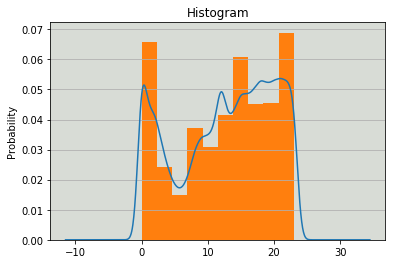

In [6]:
#np.histogram(crime[["Hood_ID"]],bins=10)
fig, ax = plt.subplots()
#crime.occurrencehour.plot.hist(bins=24, rwidth=0.9,color='#607c8e')
crime.occurrencehour.plot.kde(ax=ax, legend=False, title='Histogram')
crime.occurrencehour.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
X                      167525 non-null float64
Y                      167525 non-null float64
Index_                 167525 non-null int64
event_unique_id        167525 non-null object
occurrencedate         167525 non-null object
reporteddate           167525 non-null object
premisetype            167525 non-null object
ucr_code               167525 non-null int64
ucr_ext                167525 non-null int64
offence                167525 non-null object
reportedyear           167525 non-null int64
reportedmonth          167525 non-null object
reportedday            167525 non-null int64
reporteddayofyear      167525 non-null int64
reporteddayofweek      167525 non-null object
reportedhour           167525 non-null int64
occurrenceyear         167476 non-null float64
occurrencemonth        167476 non-null object
occurrenceday          167476 non-null float64
occurrencedayofyea

#### 3.1.1 Data manipulation and cleaning
##### To get the data into the right format, e. g., transform date variables into datetime type.

In [8]:
from datetime import datetime
crime["occdate"]=crime.occurrencedate.str.slice(0,10)
crime["repdate"]=crime.reporteddate.str.slice(0,10)
crime["occtime"]=crime.occurrencedate.str.slice(11,11+8)
crime["reptime"]=crime.reporteddate.str.slice(11,11+8)
crime["occdate"]=pd.to_datetime(crime['occdate'], format='%Y-%m-%d')

##### Extract year, month, day and hour of the crime incidents.

In [9]:
crime["occyear"]=crime['occdate'].dt.year
crime["occmonth"]=crime['occdate'].dt.month
crime["occday"]=crime['occdate'].dt.day
crime["occhour"]=crime.occtime.str.slice(0,2).astype(int)
crime["repdate"]=pd.to_datetime(crime['repdate'], format='%Y-%m-%d')
crime.occdate.head()

0   2014-04-24
1   2014-04-24
2   2014-04-25
3   2014-04-24
4   2014-04-25
Name: occdate, dtype: datetime64[ns]

In [10]:
crime[['occurrencedate','occdate','occtime','occyear','occmonth','occday','occhour']].head()

,occurrencedate,occdate,occtime,occyear,occmonth,occday,occhour
0,2014-04-24T11:29:00.000Z,2014-04-24,11:29:00,2014,4,24,11
1,2014-04-24T13:00:00.000Z,2014-04-24,13:00:00,2014,4,24,13
2,2014-04-25T13:20:00.000Z,2014-04-25,13:20:00,2014,4,25,13
3,2014-04-24T17:00:00.000Z,2014-04-24,17:00:00,2014,4,24,17
4,2014-04-25T16:00:00.000Z,2014-04-25,16:00:00,2014,4,25,16


##### Now let's have a look at the Neighbourhood column
Not sure about what the numbers in the brackets are in the Neighbourhood name. Looks like it is Neighbourhood ID. We don't need it in the name of the Neighbourhood, so we need to strip it off.

In [11]:
crime.Neighbourhood.value_counts()

Church-Yonge Corridor (75)                  6301
Waterfront Communities-The Island (77)      5674
West Humber-Clairville (1)                  4338
Moss Park (73)                              3609
Bay Street Corridor (76)                    3564
Kensington-Chinatown (78)                   3263
Woburn (137)                                3158
York University Heights (27)                3141
Downsview-Roding-CFB (26)                   2974
Annex (95)                                  2908
West Hill (136)                             2857
Islington-City Centre West (14)             2589
Dovercourt-Wallace Emerson-Junction (93)    2450
Wexford/Maryvale (119)                      2350
Bendale (127)                               2277
Mount Olive-Silverstone-Jamestown (2)       2257
Clairlea-Birchmount (120)                   2163
Mimico (includes Humber Bay Shores) (17)    2040
Malvern (132)                               2024
Black Creek (24)                            2006
Glenfield-Jane Heigh

In [12]:
crime["NeighbourName"]=crime.Neighbourhood.str.slice(0,-5)

In [13]:
crime[["Neighbourhood","NeighbourName"]].head()

,Neighbourhood,NeighbourName
0,North Riverdale (68),North Riverdale
1,Black Creek (24),Black Creek
2,Brookhaven-Amesbury (30),Brookhaven-Amesbury
3,Rexdale-Kipling (4),Rexdale-Kiplin
4,Lambton Baby Point (114),Lambton Baby Point


In [14]:
crime[crime["NeighbourName"]=="North Riverdale"].head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,ObjectId,occdate,repdate,occtime,reptime,occyear,occmonth,occday,occhour,NeighbourName
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,1,2014-04-24,2014-04-24,11:29:00,12:46:00,2014,4,24,11,North Riverdale
514,-79.347199,43.671959,644,GO-20141889146,2014-04-14T12:35:00.000Z,2014-04-14T12:45:00.000Z,Apartment,1610,100,Robbery With Weapon,...,515,2014-04-14,2014-04-14,12:35:00,12:45:00,2014,4,14,12,North Riverdale
528,-79.357582,43.674801,658,GO-20141262377,2014-01-01T12:59:00.000Z,2014-01-01T12:59:00.000Z,House,1420,110,Assault Bodily Harm,...,529,2014-01-01,2014-01-01,12:59:00,12:59:00,2014,1,1,12,North Riverdale
760,-79.352623,43.665489,1015,GO-20142283551,2014-06-13T15:12:00.000Z,2014-06-13T16:01:00.000Z,Outside,1430,100,Assault,...,761,2014-06-13,2014-06-13,15:12:00,16:01:00,2014,6,13,15,North Riverdale
1253,-79.354340,43.665050,3005,GO-20142941034,2014-09-18T22:00:00.000Z,2014-09-19T15:27:00.000Z,Apartment,2120,200,B&E,...,2254,2014-09-18,2014-09-19,22:00:00,15:27:00,2014,9,18,22,North Riverdale


##### occurrencedayofweek

In [15]:
dayofweek=crime.occurrencedayofweek.value_counts()

In [16]:
dayofweek.values

array([25442, 25187, 24284, 23439, 23262, 23083, 22779], dtype=int64)

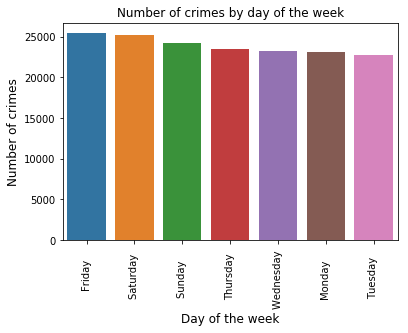

In [17]:
import seaborn as sns
import pylab as pl
sns.barplot(dayofweek.index, dayofweek.values)
pl.xticks(rotation = 90)
plt.title('Number of crimes by day of the week')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.show()

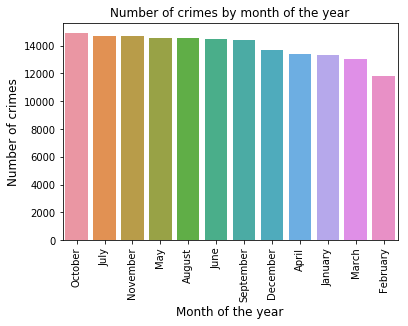

In [18]:
monthofyear=crime.occurrencemonth.value_counts()
sns.barplot(monthofyear.index, monthofyear.values)
#import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by month of the year')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Month of the year', fontsize=12)
plt.show()

##### premisetype

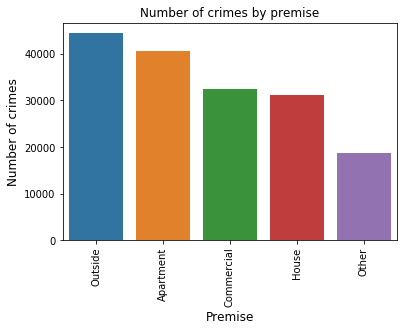

In [19]:
premise=crime.premisetype.value_counts()
sns.barplot(premise.index, premise.values)
import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by premise')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Premise', fontsize=12)
plt.show()

##### offence

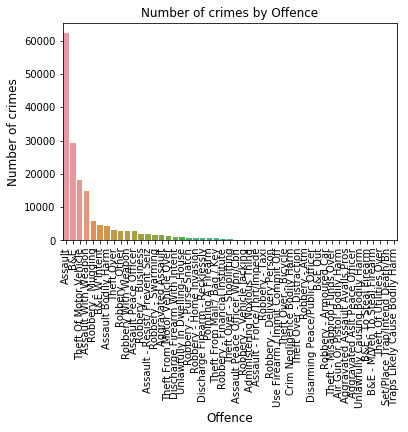

In [20]:
offence=crime.offence.value_counts()
sns.barplot(offence.index, offence.values)
#import pylab as pl
#plt.figure(figsize=(20,20))
pl.xticks(rotation = 90)
plt.title('Number of crimes by Offence')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Offence', fontsize=12)
plt.show()

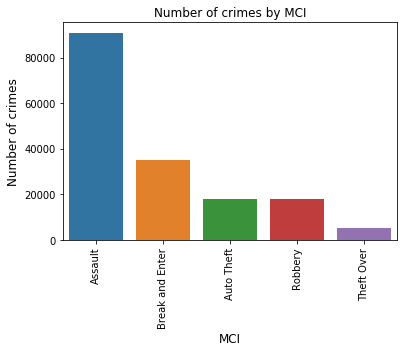

In [21]:
MCI=crime.MCI.value_counts()
sns.barplot(MCI.index, MCI.values)
#import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by MCI')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('MCI', fontsize=12)
plt.show()

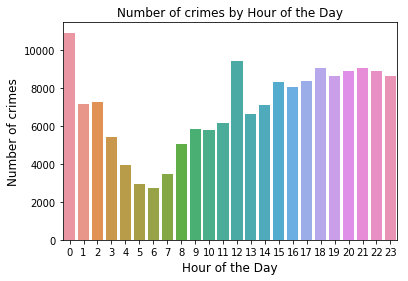

In [22]:
hourofday=crime.occurrencehour.value_counts()
sns.barplot(hourofday.index, hourofday.values)
#import pylab as pl
#pl.xticks(rotation = 90)
plt.title('Number of crimes by Hour of the Day')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.show()

### 3.2 Import the postalcodes for Toronto neighbourhoods from Wikipedia

#### First Postal codes and corresponding Latitude and Longitude data

In [23]:

LandLfile = 'http://cocl.us/Geospatial_data'
Col_headers = ["Postcode","Latitude","Longitude"]  # 

df_Geo_Toronto = pd.read_csv(LandLfile,names=Col_headers,skiprows=1)  # getting the L& L data
print("Done")

Done


In [24]:
df_Geo_Toronto.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Now get the neighbourhood names and corresponding postal codes from Wikipedia

In [25]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'  # URL of the target wikipedia page

In [26]:
import requests # Need to get wikipedia contents
from bs4 import BeautifulSoup  # import Beautifulsoup # Get BeautifulSoup package
import lxml.html as lxml

In [27]:
# Using BeautifulSoup to scrape the wikipedia page
website_URL=requests.get(url).text
#website_URL

In [28]:
#Create 
soup = BeautifulSoup(website_URL,"lxml")

In [ ]:
print(soup.prettify())

In [30]:
Table = soup.find("table",{"class":"wikitable sortable"}) 

#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lxml.fromstring(page.content)

In [31]:
doc

<Element html at 0x1cdcdd39318>

In [32]:
withlink=Table.findAll('a')

In [33]:
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]
tr_elements = doc.xpath('//tr')

In [34]:
tr_elements[1:5]

[<Element tr at 0x1cdd6cc5318>,
 <Element tr at 0x1cdd6cc5408>,
 <Element tr at 0x1cdd6cc5868>,
 <Element tr at 0x1cdd6cc58b8>]

In [35]:
#Create empty list
Dict=[]
col=[]
i=0

#For the first row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Postcode"
2:"Borough"
3:"Neighbourhood
"


In [36]:
#first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=3:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1    
[len(C) for (title,C) in col]
Dict={title:column for (title,column) in col}   # Dictionary with Postcodes, Borough and Neighbourhoods
df=pd.DataFrame(Dict)  # Creating the pandas Dataframe using the dictionary values

In [37]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [38]:
df.columns

Index(['Postcode', 'Borough', 'Neighbourhood\n'], dtype='object')

In [39]:
df_Borough=df[df.Borough != 'Not assigned']   # get rid of "Not assigned" boroughs

In [40]:
df_Borough.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n
5,M5A,Downtown Toronto,Regent Park\n
6,M6A,North York,Lawrence Heights\n


In [41]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [42]:
df_Borough.columns = ['Postcode', 'Borough', 'Neighbourhood']

In [43]:
df_Borough["Neighbourhood"]=df_Borough.Neighbourhood.str.slice(0,-1)
df_Borough['Neighbourhood'].head()

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2           Parkwoods
3    Victoria Village
4        Harbourfront
5         Regent Park
6    Lawrence Heights
Name: Neighbourhood, dtype: object

In [44]:
df_Borough.loc[df_Borough.Neighbourhood == 'Not assigned', 'Neighbourhood'] = df_Borough.Borough

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new=df_Borough.groupby('Postcode', sort=False)['Neighbourhood'].apply(','.join)  # group neighbourhoods by Postcode

In [46]:
df_new_FINAL=pd.DataFrame({'Postcode':df_new.index, 'df_new':df_new.values})
df_new_F=df_new_FINAL.rename(columns={ df_new_FINAL.columns[1]: "Neighbourhood" })
df_N=df_new_F['Neighbourhood'].tolist() # create a neighbourhood list

In [47]:
df_Borough_BONLY=df_Borough['Borough'] # create a Borough lit
df_Borough_PONLY=df_Borough['Postcode'] # create a postcode list

In [48]:
df_Borough_BandP=pd.concat([df_Borough_PONLY, df_Borough_BONLY], axis=1)
df_Borough_BandP_new = df_Borough_BandP.drop_duplicates(subset=['Postcode','Borough'])  # drop duplicates

In [49]:
df_P=df_Borough_BandP_new['Postcode'].tolist() # refined lists
df_B=df_Borough_BandP_new['Borough'].tolist() # refined lists

In [50]:
Toronto_DICT= {'Postcode':df_P,'Borough':df_B, 'Neighbourhood':df_N} # Create a dictionary with the 3 refined lists
Toronto_df=pd.DataFrame(Toronto_DICT) # create the dataframe
# "List of Postcodes, Boroughs, & Neighbourhoods in TORONTO FOR 103 POSTCODES"
Toronto_df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


##### Now link the geo-codes and neighbourhood data

In [51]:
df_Neighbour_FINAL=pd.merge(Toronto_df, df_Geo_Toronto, on='Postcode', how='inner')  # merging the dataframes to get the L & L data annexed to the earlier DataFrame

In [52]:
df_Neighbour_FINAL.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [53]:
df_Toronto_Special=df_Neighbour_FINAL[df_Neighbour_FINAL['Borough'].str.contains("Toronto")]   # select Boroughs with "Toronto"
df_Toronto_Special.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [54]:
df_Neighbour_FINAL.shape

(103, 5)

### 3.3 Link Crime data and Wikipedia data
In this section, we are going to link the Crime data and Wikipedia data. More specifically, we want to get the postcode information into the Crime data, to prepare for the data merging with Foursquare data in the next step.

In [55]:
Crime_wiki=pd.merge(crime, df_Borough[["Postcode","Neighbourhood"]], left_on='NeighbourName', right_on="Neighbourhood", how='left')  

In [56]:
Crime_wiki.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,repdate,occtime,reptime,occyear,occmonth,occday,occhour,NeighbourName,Postcode,Neighbourhood_y
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,2014-04-24,11:29:00,12:46:00,2014,4,24,11,North Riverdale,NaN,NaN
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24T15:58:00.000Z,House,2120,200,B&E,...,2014-04-24,13:00:00,15:58:00,2014,4,24,13,Black Creek,NaN,NaN
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25T13:52:00.000Z,Apartment,1430,100,Assault,...,2014-04-25,13:20:00,13:52:00,2014,4,25,13,Brookhaven-Amesbury,NaN,NaN
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25T10:30:00.000Z,Outside,1430,100,Assault,...,2014-04-25,17:00:00,10:30:00,2014,4,24,17,Rexdale-Kiplin,NaN,NaN
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25T16:15:00.000Z,Apartment,1430,100,Assault,...,2014-04-25,16:00:00,16:15:00,2014,4,25,16,Lambton Baby Point,NaN,NaN


In [57]:
Crime_wiki_1=Crime_wiki[Crime_wiki["Postcode"].notnull()]

In [58]:
Crime_wiki_1.Postcode.value_counts()

M9L    1590
M6R    1416
M8W    1017
M3C    1001
M5A     980
M3H     951
M4E     853
M8V     841
M2K     798
M4H     746
M6J     703
M2H     687
M4A     594
M2R     548
M2J     472
M9C     293
Name: Postcode, dtype: int64

In [59]:
Crime_wiki.shape

(167525, 40)

In [60]:
Crime_wiki_1.shape

(13490, 40)

In [61]:
Crime_wiki_1.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,repdate,occtime,reptime,occyear,occmonth,occday,occhour,NeighbourName,Postcode,Neighbourhood_y
13,-79.466927,43.768856,228,GO-20141297607,2014-01-07T11:29:00.000Z,2014-01-07T11:29:00.000Z,Other,1480,100,Assault - Resist/ Prevent Seiz,...,2014-01-07,11:29:00,11:29:00,2014,1,7,11,Bathurst Manor,M3H,Bathurst Manor
18,-79.363220,43.655880,233,GO-20141262013,2014-01-01T11:01:00.000Z,2014-01-01T11:09:00.000Z,Outside,1420,110,Assault Bodily Harm,...,2014-01-01,11:01:00,11:09:00,2014,1,1,11,Regent Park,M5A,Regent Park
43,-79.378380,43.768837,258,GO-20141056448,2014-01-06T07:12:00.000Z,2014-01-06T07:12:00.000Z,Apartment,1430,100,Assault,...,2014-01-06,07:12:00,07:12:00,2014,1,6,7,Bayview Village,M2K,Bayview Village
52,-79.349037,43.768383,267,GO-20141342156,2014-01-14T14:22:00.000Z,2014-01-14T15:00:00.000Z,House,2130,210,Theft Over,...,2014-01-14,14:22:00,15:00:00,2014,1,14,14,Henry Farm,M2J,Henry Farm
60,-79.466927,43.768856,275,GO-20141436427,2014-01-30T10:27:00.000Z,2014-01-31T09:56:00.000Z,Other,1430,100,Assault,...,2014-01-31,10:27:00,09:56:00,2014,1,30,10,Bathurst Manor,M3H,Bathurst Manor


#### Note:
It should be noted here that the crime data contains far more neihbourhoods than the wikipedia data, which contains only the core Toronto area. In order to make use of the Foursquare data and analysis, we are going to limit the analysis to those communities in the core Toronto area. That is we are going to use those neighbourhoods that are only listed in the wikipedia data. As you can actually see that the resultant dataset has dramatically less records than in the original crime data.

### 3.4 Import the venue data from Foursquare

In [62]:
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

In [63]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [64]:
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
print(installed_packages)

['alabaster', 'altair', 'anaconda-client', 'anaconda-navigator', 'anaconda-project', 'asn1crypto', 'astroid', 'astropy', 'atomicwrites', 'attrs', 'Babel', 'backcall', 'backports.os', 'backports.shutil-get-terminal-size', 'beautifulsoup4', 'bitarray', 'bkcharts', 'bleach', 'bokeh', 'boto', 'Bottleneck', 'branca', 'certifi', 'cffi', 'chardet', 'Click', 'cloudpickle', 'clyent', 'colorama', 'comtypes', 'conda', 'conda-build', 'conda-verify', 'contextlib2', 'cryptography', 'cycler', 'Cython', 'cytoolz', 'dask', 'decorator', 'defusedxml', 'distributed', 'docutils', 'entrypoints', 'et-xmlfile', 'fastcache', 'filelock', 'Flask', 'folium', 'future', 'geographiclib', 'geopy', 'gevent', 'glob2', 'greenlet', 'h5py', 'heapdict', 'html5lib', 'idna', 'imageio', 'imagesize', 'importlib-metadata', 'ipykernel', 'ipython', 'ipython-genutils', 'ipywidgets', 'isort', 'itsdangerous', 'jdcal', 'jedi', 'Jinja2', 'jsonschema', 'jupyter', 'jupyter-client', 'jupyter-console', 'jupyter-core', 'jupyterlab', 'jupyt

In [65]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [66]:
address = 'Toronto, Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto_Special['Latitude'], df_Toronto_Special['Longitude'], df_Toronto_Special['Borough'], df_Toronto_Special['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [67]:
neighborhoods=df_Toronto_Special
CT_data = neighborhoods[neighborhoods['Borough'] == 'Central Toronto'].reset_index(drop=True)
CT_data.head()

address = 'Central Toronto, Ontario'  # selecting central Toronto (CT) for deep dive

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_CT = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(CT_data['Latitude'], CT_data['Longitude'], CT_data['Borough'], CT_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CT)  
    
map_CT

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  import sys


The geograpical coordinate of Central Toronto are 43.6449033, -79.3818364.


In [ ]:
CLIENT_ID = 'XXXCVUVM1ICDDJIYMQ2RYMWEV5BT15O00ZUXID1UFCYQ1X2Y' # your Foursquare ID
CLIENT_SECRET = 'REDZTV5GQ1RYQX3UE5I53EQ0WBSB2KKG5U2G5GGAXJ5UDOF1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CT_data.loc[0, 'Neighbourhood']

neighborhood_latitude = CT_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = CT_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = CT_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 50 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()
results

#### This Function is to get venue information for a given neighbourhood (as specified by its latitudes and longitudes) within a given radius.


In [69]:

def getNearbyVenues(names, Postcode,latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, PC, lat, lng in zip(names, Postcode, latitudes, longitudes):
        print(name,PC)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            PC,
            lat, 
            lng, 
            v['venue']['name'], 
#            v['venue']['location']['address'], # Included
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance'], # Included
            v['venue']['categories'][0]['id'], # Included
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Postcode',           
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
#                  'Venue Address',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue distance', 
                  'Venue ID', 
                  'Venue Category']
    
    return(nearby_venues)

### Note on Foursquare data:
It should be mentioned here that the iteractive way above to get venues can produce duplications. One venues can appear in multiple queries (neighbourhoods), especially when the radius is set too high. The configuration below is based on extensive experiemntations. A radius of 1,200 meters seems to produce least duplications, yet most non-duplicated venues. There is another thing that should be mentioned here. Foursquare set a limit of return to be 100 (even though on its website it says limit=50). That means even if there are more than 100 unique venues in a neighbourhood, each Foursquare API call would return only 100 of them at most. This would potentially limit the conclusion of the study. However, in this capstone project, we shall assume 100 is good enough to cover a representative number of venues within a neighbourhood.

Also because of our choice of the radius of 1,200 meters, there could be incomplete of venues in a neighbourhood, if its radius is greater than 1,200 meters. But for the purpose of our study, we would assume this radius is large enough to cover the whole community.

In [70]:
# type your answer here
Toronto_venues = getNearbyVenues(names=df_Toronto_Special['Neighbourhood'],Postcode=df_Toronto_Special['Postcode'],
                                   latitudes=df_Toronto_Special['Latitude'],
                                   longitudes=df_Toronto_Special['Longitude'],
                                   radius=1200,
                                   LIMIT=5000
                                  )



Harbourfront,Regent Park M5A
Ryerson,Garden District M5B
St. James Town M5C
The Beaches M4E
Berczy Park M5E
Central Bay Street M5G
Christie M6G
Adelaide,King,Richmond M5H
Dovercourt Village,Dufferin M6H
Harbourfront East,Toronto Islands,Union Station M5J
Little Portugal,Trinity M6J
The Danforth West,Riverdale M4K
Design Exchange,Toronto Dominion Centre M5K
Brockton,Exhibition Place,Parkdale Village M6K
The Beaches West,India Bazaar M4L
Commerce Court,Victoria Hotel M5L
Studio District M4M
Lawrence Park M4N
Roselawn M5N
Davisville North M4P
Forest Hill North,Forest Hill West M5P
High Park,The Junction South M6P
North Toronto West M4R
The Annex,North Midtown,Yorkville M5R
Parkdale,Roncesvalles M6R
Davisville M4S
Harbord,University of Toronto M5S
Runnymede,Swansea M6S
Moore Park,Summerhill East M4T
Chinatown,Grange Park,Kensington Market M5T
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West M4V
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway La

In [71]:
print(Toronto_venues.shape)

(3423, 10)


In [72]:
Toronto_venues.head()

,Neighborhood,Postcode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue distance,Venue ID,Venue Category
0,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,143,4bf58dd8d48988d16a941735,Bakery
1,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,122,4bf58dd8d48988d1e0931735,Coffee Shop
2,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,247,4bf58dd8d48988d175941735,Gym / Fitness Center
3,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,459,4deefb944765f83613cdba6e,Historic Site
4,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,376,4bf58dd8d48988d1c4941735,Restaurant


In [73]:
Toronto_venues.drop_duplicates(subset=["Venue","Venue Latitude","Venue Longitude"],keep='first', inplace=True)

In [74]:
Toronto_venues.shape

(2111, 10)

In [75]:
Toronto_venues["Neighborhood"].value_counts()

Harbourfront,Regent Park                                                                                100
Little Portugal,Trinity                                                                                 100
The Danforth West,Riverdale                                                                             100
Christie                                                                                                100
The Beaches                                                                                             100
Dovercourt Village,Dufferin                                                                              94
Ryerson,Garden District                                                                                  92
High Park,The Junction South                                                                             91
Moore Park,Summerhill East                                                                               91
Studio District             

### 3.5 Link Crime data and Neighbourhood venue data

In [76]:
Toronto_df_1=Toronto_df
Toronto_df_1.columns=['Postcode', 'Borough', 'Neighborhood']
Toronto_df_1.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [77]:
Toronto_venues.head()

,Neighborhood,Postcode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue distance,Venue ID,Venue Category
0,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,143,4bf58dd8d48988d16a941735,Bakery
1,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,122,4bf58dd8d48988d1e0931735,Coffee Shop
2,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,247,4bf58dd8d48988d175941735,Gym / Fitness Center
3,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,459,4deefb944765f83613cdba6e,Historic Site
4,"Harbourfront,Regent Park",M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,376,4bf58dd8d48988d1c4941735,Restaurant


In [78]:
Postcode_venue=pd.crosstab(Toronto_venues["Postcode"],Toronto_venues["Venue Category"])

In [79]:
Postcode_venue.head()

Venue Category,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
Postcode,,,,,,,,,,,,,,,,,,,,,
M4E,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
M4K,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
M4L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
M4M,0,0,0,0,0,4,0,0,1,0,...,2,0,0,5,0,0,0,0,1,0
M4N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
venue_category=Toronto_venues["Venue Category"].value_counts()

In [81]:
venue_category.columns=["Venue Category","Venue value counts"]

In [82]:
df_venue_category=venue_category.to_frame()

In [83]:
df_venue_category.columns=["Venue value counts"]

In [84]:
df_venue_category["Venue Category"]=df_venue_category.index

In [85]:
df_venue_category.head()

,Venue value counts,Venue Category
Coffee Shop,159,Coffee Shop
Café,123,Café
Italian Restaurant,71,Italian Restaurant
Park,66,Park
Bakery,63,Bakery


In [86]:
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
venue_category.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [87]:
venue_category_1=pd.read_excel('pandas_simple.xlsx',index_col=None)

In [88]:
venue_category_1.head()

,Unnamed: 0,Venue Category
0,Coffee Shop,159
1,Café,123
2,Italian Restaurant,71
3,Park,66
4,Bakery,63


In [89]:
Toronto_venues_1=pd.merge(Toronto_venues,df_venue_category,left_on="Venue Category", right_on="Venue Category", how='inner')  

In [90]:
Toronto_venues_1.head()

,Neighborhood,Postcode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue distance,Venue ID,Venue Category,Venue value counts
0,"Harbourfront,Regent Park",M5A,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,143,4bf58dd8d48988d16a941735,Bakery,63
1,"Harbourfront,Regent Park",M5A,43.654260,-79.360636,Brick Street Bakery,43.650574,-79.359539,419,4bf58dd8d48988d16a941735,Bakery,63
2,"Harbourfront,Regent Park",M5A,43.654260,-79.360636,The Sweet Escape Patisserie,43.650632,-79.358709,432,4bf58dd8d48988d16a941735,Bakery,63
3,"Harbourfront,Regent Park",M5A,43.654260,-79.360636,Stonemill Bread,43.648668,-79.371610,1081,4bf58dd8d48988d16a941735,Bakery,63
4,St. James Town,M5C,43.651494,-79.375418,Sud Forno,43.650940,-79.379045,298,4bf58dd8d48988d16a941735,Bakery,63


In [91]:
Postcode_venue_1=pd.crosstab(Toronto_venues_1["Postcode"],Toronto_venues_1["Venue Category"])

In [92]:
Postcode_venue_2=pd.crosstab(Toronto_venues_1["Postcode"],columns="Venue value counts")

In [93]:
Postcode_venue_3=pd.merge(Postcode_venue_1,Postcode_venue_2,left_on="Postcode", right_index=True, how='inner')  

In [94]:
Postcode_venue_1.shape

(36, 273)

In [95]:
Postcode_venue_3.head()

,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Venue value counts
Postcode,,,,,,,,,,,,,,,,,,,,,
M4E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
M4K,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,100
M4L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,81
M4M,0,0,0,0,0,4,0,0,1,0,...,0,0,5,0,0,0,0,1,0,89
M4N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


In [96]:
Crime_wiki_1.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,repdate,occtime,reptime,occyear,occmonth,occday,occhour,NeighbourName,Postcode,Neighbourhood_y
13,-79.466927,43.768856,228,GO-20141297607,2014-01-07T11:29:00.000Z,2014-01-07T11:29:00.000Z,Other,1480,100,Assault - Resist/ Prevent Seiz,...,2014-01-07,11:29:00,11:29:00,2014,1,7,11,Bathurst Manor,M3H,Bathurst Manor
18,-79.363220,43.655880,233,GO-20141262013,2014-01-01T11:01:00.000Z,2014-01-01T11:09:00.000Z,Outside,1420,110,Assault Bodily Harm,...,2014-01-01,11:01:00,11:09:00,2014,1,1,11,Regent Park,M5A,Regent Park
43,-79.378380,43.768837,258,GO-20141056448,2014-01-06T07:12:00.000Z,2014-01-06T07:12:00.000Z,Apartment,1430,100,Assault,...,2014-01-06,07:12:00,07:12:00,2014,1,6,7,Bayview Village,M2K,Bayview Village
52,-79.349037,43.768383,267,GO-20141342156,2014-01-14T14:22:00.000Z,2014-01-14T15:00:00.000Z,House,2130,210,Theft Over,...,2014-01-14,14:22:00,15:00:00,2014,1,14,14,Henry Farm,M2J,Henry Farm
60,-79.466927,43.768856,275,GO-20141436427,2014-01-30T10:27:00.000Z,2014-01-31T09:56:00.000Z,Other,1430,100,Assault,...,2014-01-31,10:27:00,09:56:00,2014,1,30,10,Bathurst Manor,M3H,Bathurst Manor


#### Final dataset for classification analysis
Below is the final dataset after combining data from Crime, Wikipedia and Foursquare.It will be used for machine learning development.

In [97]:
df_Toronto=pd.merge(Crime_wiki_1,Postcode_venue_3,on="Postcode", how='inner')  

In [98]:
df_Toronto.shape

(3952, 314)

In [99]:
df_Toronto.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Venue value counts
0,-79.363220,43.655880,233,GO-20141262013,2014-01-01T11:01:00.000Z,2014-01-01T11:09:00.000Z,Outside,1420,110,Assault Bodily Harm,...,0,0,0,0,0,0,0,1,0,100
1,-79.362717,43.659432,23,GO-20141340474,2014-01-13T21:30:00.000Z,2014-01-14T08:57:00.000Z,Outside,2132,200,Theft From Motor Vehicle Over,...,0,0,0,0,0,0,0,1,0,100
2,-79.366287,43.660114,62,GO-20141624547,2014-03-02T02:39:00.000Z,2014-03-02T02:56:00.000Z,Commercial,1430,100,Assault,...,0,0,0,0,0,0,0,1,0,100
3,-79.363548,43.661377,99,GO-20141303582,2014-01-08T10:25:00.000Z,2014-01-08T13:07:00.000Z,Apartment,1430,100,Assault,...,0,0,0,0,0,0,0,1,0,100
4,-79.363548,43.661377,100,GO-20141303582,2014-01-08T10:25:00.000Z,2014-01-08T13:07:00.000Z,Apartment,1610,200,Robbery - Mugging,...,0,0,0,0,0,0,0,1,0,100


In [100]:
Crime_wiki_1.shape

(13490, 40)

#### Final dataset for linear regression
Below is the final dataset after combining data from Crime, Wikipedia and Foursquare.It will be used for machine learning development.

In [101]:
crime_counts=pd.crosstab(df_Toronto["Postcode"],df_Toronto["MCI"])
linear_Toronto=pd.merge(crime_counts,Postcode_venue_3,on="Postcode", how='inner')  

In [102]:
df_Toronto.Postcode.value_counts()

M6R    1416
M5A     980
M4E     853
M6J     703
Name: Postcode, dtype: int64

## 4 Summary statistics on final dataset

### Venues

Here we want to explore the final data before we start to develop various machine learning models to predict the crime.

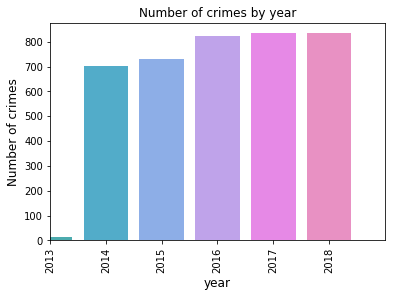

In [103]:
occofyear=df_Toronto.occyear.value_counts()
sns.barplot(occofyear.index, occofyear.values)
#import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by year')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.xlim((7,13))
plt.show()

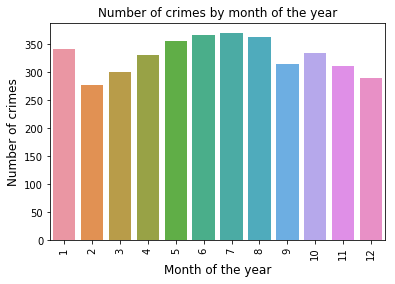

In [104]:
monthofyear=df_Toronto.occmonth.value_counts()
sns.barplot(monthofyear.index, monthofyear.values)
#import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by month of the year')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Month of the year', fontsize=12)
plt.show()

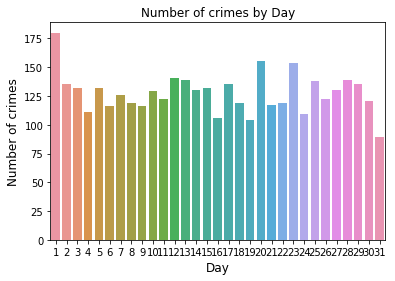

In [105]:
occofday=df_Toronto.occday.value_counts()
sns.barplot(occofday.index, occofday.values)
#import pylab as pl
#pl.xticks(rotation = 90)
plt.title('Number of crimes by Day')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()

##### premisetype

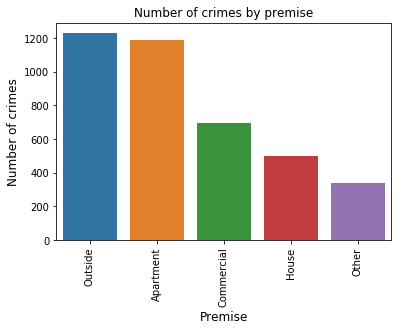

In [106]:
premise=df_Toronto.premisetype.value_counts()
sns.barplot(premise.index, premise.values)
import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by premise')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Premise', fontsize=12)
plt.show()

In [107]:
premise_MCI_Assault=df_Toronto.premisetype[df_Toronto["MCI"]=="Assault"].value_counts()
premise_MCI_BaE=df_Toronto.premisetype[df_Toronto["MCI"]=="Break and Enter"].value_counts()
premise_MCI_Robbery=df_Toronto.premisetype[df_Toronto["MCI"]=="Robbery"].value_counts()
premise_MCI_AT=df_Toronto.premisetype[df_Toronto["MCI"]=="Auto Theft"].value_counts()
premise_MCI_TO=df_Toronto.premisetype[df_Toronto["MCI"]=="Theft Over"].value_counts()


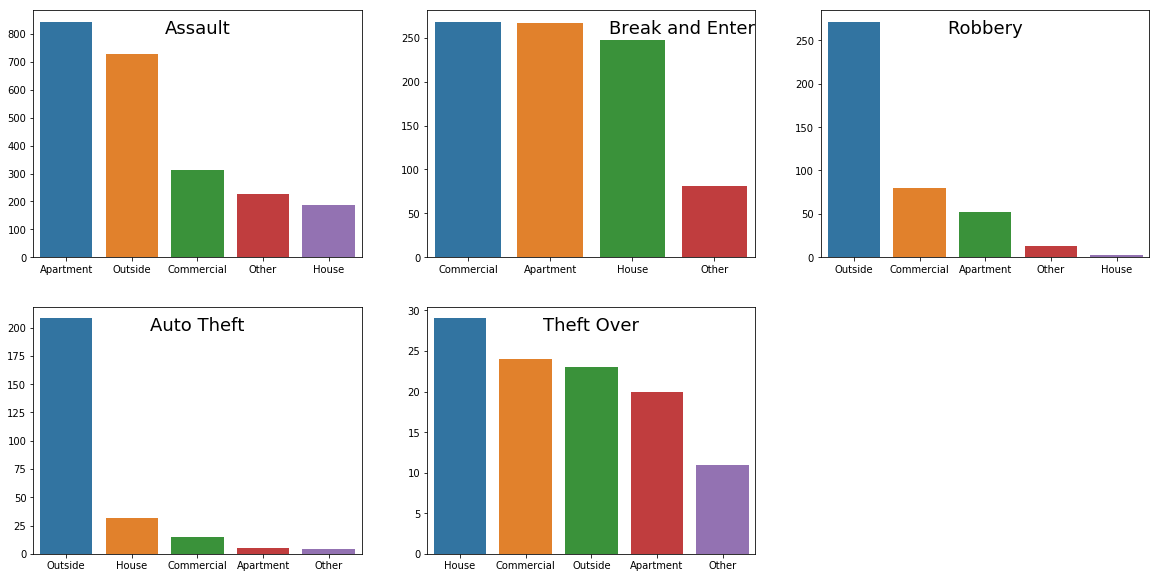

In [108]:

plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
sns.barplot(premise_MCI_Assault.index, premise_MCI_Assault.values)
plt.text(2, 0.95*max(premise_MCI_Assault.values), "Assault",
             fontsize=18, ha='center')
plt.subplot(2, 3, 2)
sns.barplot(premise_MCI_BaE.index, premise_MCI_BaE.values)
plt.text(2.6, 0.95*max(premise_MCI_BaE.values), "Break and Enter",
             fontsize=18, ha='center')
plt.subplot(2, 3, 3)
sns.barplot(premise_MCI_Robbery.index, premise_MCI_Robbery.values)
plt.text(2, 0.95*max(premise_MCI_Robbery.values), "Robbery",
             fontsize=18, ha='center')
plt.subplot(2, 3, 4)
sns.barplot(premise_MCI_AT.index, premise_MCI_AT.values)
plt.text(2, 0.95*max(premise_MCI_AT.values), "Auto Theft",
             fontsize=18, ha='center')
plt.subplot(2, 3, 5)
sns.barplot(premise_MCI_TO.index, premise_MCI_TO.values)
plt.text(2, 0.95*max(premise_MCI_TO.values), "Theft Over",
             fontsize=18, ha='center')
plt.show()

##### offence

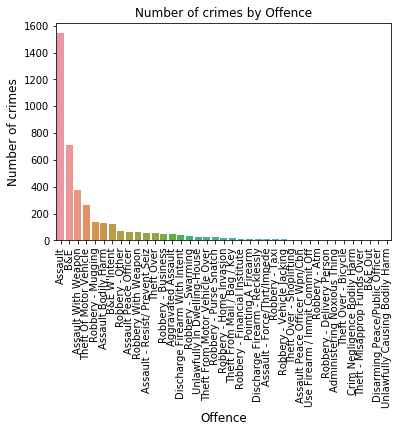

In [109]:
offence=df_Toronto.offence.value_counts()
sns.barplot(offence.index, offence.values)
#import pylab as pl
#plt.figure(figsize=(20,20))
pl.xticks(rotation = 90)
plt.title('Number of crimes by Offence')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Offence', fontsize=12)
plt.show()

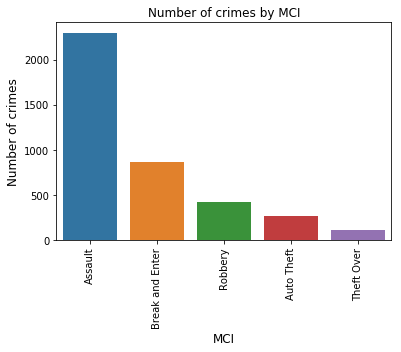

In [110]:
MCI=df_Toronto.MCI.value_counts()
sns.barplot(MCI.index, MCI.values)
#import pylab as pl
pl.xticks(rotation = 90)
plt.title('Number of crimes by MCI')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('MCI', fontsize=12)
plt.show()

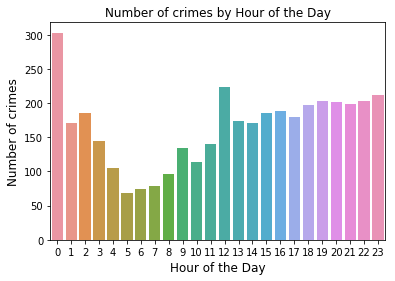

In [111]:
hourofday=df_Toronto.occurrencehour.value_counts()
sns.barplot(hourofday.index, hourofday.values)
#import pylab as pl
#pl.xticks(rotation = 90)
plt.title('Number of crimes by Hour of the Day')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.show()

In [112]:
hour_MCI_Assault=df_Toronto.occurrencehour[df_Toronto["MCI"]=="Assault"].value_counts()
hour_MCI_BaE=df_Toronto.occurrencehour[df_Toronto["MCI"]=="Break and Enter"].value_counts()
hour_MCI_Robbery=df_Toronto.occurrencehour[df_Toronto["MCI"]=="Robbery"].value_counts()
hour_MCI_AT=df_Toronto.occurrencehour[df_Toronto["MCI"]=="Auto Theft"].value_counts()
hour_MCI_TO=df_Toronto.occurrencehour[df_Toronto["MCI"]=="Theft Over"].value_counts()


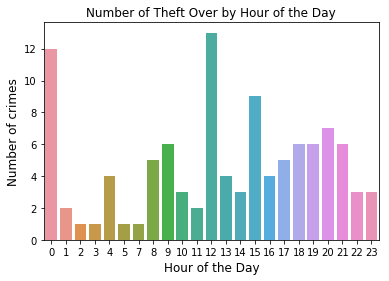

In [113]:
#sns.barplot(hour_MCI_Assault.index, hour_MCI_Assault.values)
#sns.barplot(hour_MCI_BaE.index, hour_MCI_BaE.values)
#sns.barplot(hour_MCI_Robbery.index, hour_MCI_Robbery.values)
#sns.barplot(hour_MCI_AT.index, hour_MCI_AT.values)
sns.barplot(hour_MCI_TO.index, hour_MCI_TO.values)

#import pylab as pl
#pl.xticks(rotation = 90)
plt.title('Number of Theft Over by Hour of the Day')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.show()

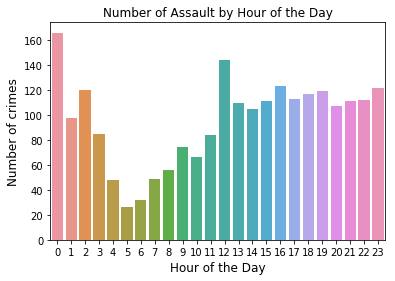

In [114]:
sns.barplot(hour_MCI_Assault.index, hour_MCI_Assault.values)
#sns.barplot(hour_MCI_BaE.index, hour_MCI_BaE.values)
#sns.barplot(hour_MCI_Robbery.index, hour_MCI_Robbery.values)
#sns.barplot(hour_MCI_AT.index, hour_MCI_AT.values)
#sns.barplot(hour_MCI_TO.index, hour_MCI_TO.values)

#import pylab as pl
#pl.xticks(rotation = 90)
plt.title('Number of Assault by Hour of the Day')
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.show()

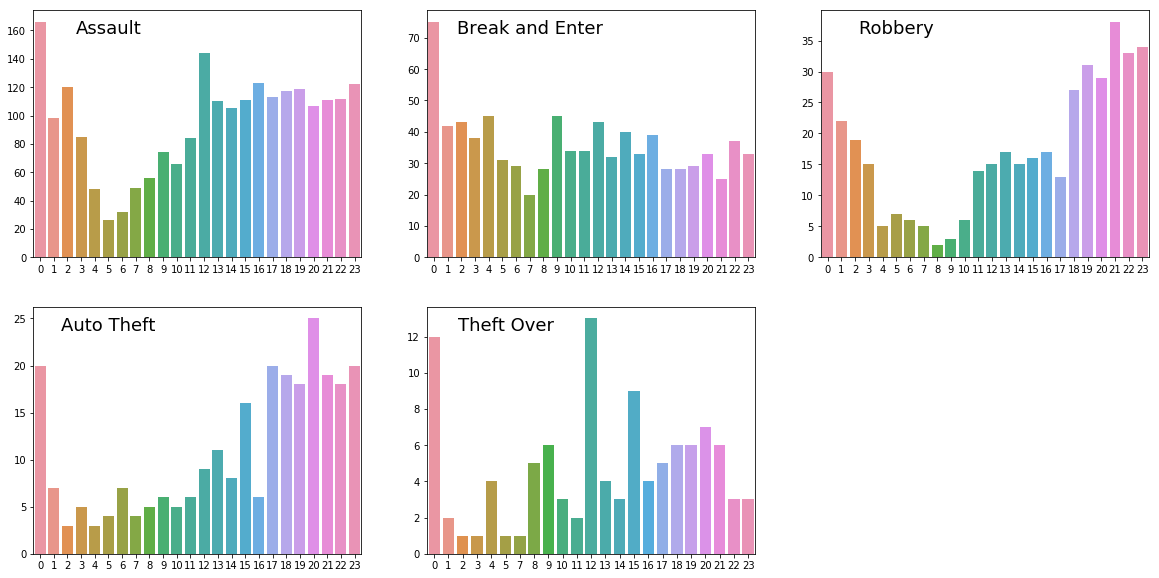

In [115]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
sns.barplot(hour_MCI_Assault.index, hour_MCI_Assault.values)
plt.text(5, 0.95*max(hour_MCI_Assault.values), "Assault",
             fontsize=18, ha='center')
plt.subplot(2, 3, 2)
sns.barplot(hour_MCI_BaE.index, hour_MCI_BaE.values)
plt.text(7, 0.95*max(hour_MCI_BaE.values), "Break and Enter",
             fontsize=18, ha='center')
plt.subplot(2, 3, 3)
sns.barplot(hour_MCI_Robbery.index, hour_MCI_Robbery.values)
plt.text(5, 0.95*max(hour_MCI_Robbery.values), "Robbery",
             fontsize=18, ha='center')
plt.subplot(2, 3, 4)
sns.barplot(hour_MCI_AT.index, hour_MCI_AT.values)
plt.text(5, 0.95*max(hour_MCI_AT.values), "Auto Theft",
             fontsize=18, ha='center')
plt.subplot(2, 3, 5)
sns.barplot(hour_MCI_TO.index, hour_MCI_TO.values)
plt.text(5, 0.95*max(hour_MCI_TO.values), "Theft Over",
             fontsize=18, ha='center')
plt.show()

In [116]:
list(df_Toronto.columns);

## 5 Predit the occurrence of crime using Machine Learning 

### Model Data preparation

We are going to import all the necessary packages below:

In [117]:
from sklearn import preprocessing as prep
from sklearn import svm
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


In [118]:
Feature=df_Toronto.drop(['X', 'Y', 'Index_', 'event_unique_id', 
                       'occurrencedate', 'reporteddate', 'ucr_code', 'ucr_ext', 'offence', 
                       'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear', 
                       'reporteddayofweek', 'reportedhour', 'occurrenceyear', 'occurrencemonth', 
                       'occurrenceday', 'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 
                       'MCI', 'Division', 'Hood_ID', 'Neighbourhood_x', 'Lat', 'Long', 'ObjectId', 
                       'NeighbourName', 'Neighbourhood_y'],axis=1)

Feature = pd.concat([Feature,pd.get_dummies(df_Toronto['premisetype'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_Toronto['Postcode'])], axis=1)

Feature.drop(["premisetype","occdate","repdate","occtime","reptime","Postcode"],axis=1,inplace=True)
X_all=Feature
y_all=df_Toronto[['MCI']];

X_train, X_test, y_train, y_test = train_test_split( X_all, y_all, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2766, 287) (2766, 1)
Test set: (1186, 287) (1186, 1)


In [119]:
X_all.head()

,occyear,occmonth,occday,occhour,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,...,Venue value counts,Apartment,Commercial,House,Other,Outside,M4E,M5A,M6J,M6R
0,2014,1,1,11,0,0,0,0,0,0,...,100,0,0,0,0,1,0,1,0,0
1,2014,1,13,21,0,0,0,0,0,0,...,100,0,0,0,0,1,0,1,0,0
2,2014,3,2,2,0,0,0,0,0,0,...,100,0,1,0,0,0,0,1,0,0
3,2014,1,8,10,0,0,0,0,0,0,...,100,1,0,0,0,0,0,1,0,0
4,2014,1,8,10,0,0,0,0,0,0,...,100,1,0,0,0,0,0,1,0,0


In [120]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision Tree

In [121]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
y_hat_Tree = Tree.predict(X_test)

In [124]:
print (y_hat_Tree [0:5])
print (y_test [0:5])

['Assault' 'Assault' 'Break and Enter' 'Assault' 'Assault']
                  MCI
984           Assault
3864  Break and Enter
29    Break and Enter
2806          Assault
859           Assault


In [125]:
y_test.MCI.value_counts()

Assault            706
Break and Enter    261
Robbery            108
Auto Theft          77
Theft Over          34
Name: MCI, dtype: int64

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [126]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train.values.ravel())
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
y_hat_KNN = neigh.predict(X_test)
y_hat_KNN[0:5]

array(['Assault', 'Assault', 'Assault', 'Robbery', 'Assault'],
      dtype=object)

                 precision    recall  f1-score   support

        Assault       0.61      0.85      0.71       706
     Auto Theft       0.32      0.09      0.14        77
Break and Enter       0.30      0.15      0.20       261
        Robbery       0.22      0.09      0.13       108
     Theft Over       0.00      0.00      0.00        34

      micro avg       0.55      0.55      0.55      1186
      macro avg       0.29      0.24      0.24      1186
   weighted avg       0.47      0.55      0.49      1186

Confusion matrix, without normalization
[[601  10  73  20   2]
 [ 62   7   4   4   0]
 [213   1  38   9   0]
 [ 88   1   9  10   0]
 [ 27   3   2   2   0]]


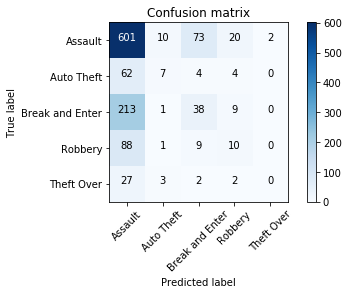

In [128]:
# Compute confusion matrix
KNN_cnf_matrix = confusion_matrix(y_test, y_hat_KNN)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat_KNN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(KNN_cnf_matrix, classes=['Assault','Auto Theft', 'Break and Enter','Robbery','Theft Over'],normalize= False,  title='Confusion matrix')

# Support Vector Machine

In [129]:
SVM = svm.SVC(kernel='rbf',gamma='scale')
SVM.fit(X_train, y_train.values.ravel()) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_hat_SVM = SVM.predict(X_test)
y_hat_SVM [0:5]

array(['Assault', 'Assault', 'Assault', 'Assault', 'Assault'],
      dtype=object)

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

        Assault       0.60      1.00      0.75       706
     Auto Theft       0.00      0.00      0.00        77
Break and Enter       0.00      0.00      0.00       261
        Robbery       0.00      0.00      0.00       108
     Theft Over       0.00      0.00      0.00        34

      micro avg       0.60      0.60      0.60      1186
      macro avg       0.12      0.20      0.15      1186
   weighted avg       0.35      0.60      0.44      1186

Confusion matrix, without normalization
[[706   0   0   0   0]
 [ 77   0   0   0   0]
 [261   0   0   0   0]
 [108   0   0   0   0]
 [ 34   0   0   0   0]]


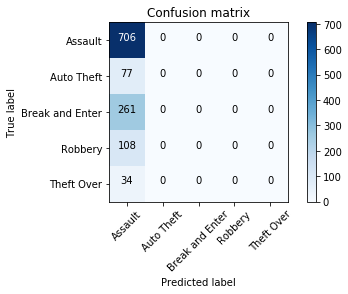

In [131]:
# Compute confusion matrix
SVM_cnf_matrix = confusion_matrix(y_test, y_hat_SVM)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(SVM_cnf_matrix, classes=['Assault','Auto Theft', 'Break and Enter','Robbery','Theft Over'],normalize= False,  title='Confusion matrix')

# Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
LR = LogisticRegression(C=0.01, solver='saga',multi_class="multinomial").fit(X_train,y_train.values.ravel())
LR

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
y_hat_LR = LR.predict(X_test)
y_hat_LR[0:5]

array(['Assault', 'Assault', 'Assault', 'Assault', 'Assault'],
      dtype=object)

In [135]:
y_hat_prob_LR = LR.predict_proba(X_test)
y_hat_prob_LR[0:5]

array([[0.55, 0.05, 0.28, 0.09, 0.02],
       [0.53, 0.07, 0.27, 0.1 , 0.03],
       [0.6 , 0.05, 0.23, 0.1 , 0.03],
       [0.49, 0.08, 0.24, 0.15, 0.03],
       [0.59, 0.05, 0.24, 0.1 , 0.03]])

### Confusion Matrix for Logistic Regression

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

        Assault       0.60      1.00      0.75       706
     Auto Theft       0.00      0.00      0.00        77
Break and Enter       0.00      0.00      0.00       261
        Robbery       0.00      0.00      0.00       108
     Theft Over       0.00      0.00      0.00        34

      micro avg       0.60      0.60      0.60      1186
      macro avg       0.12      0.20      0.15      1186
   weighted avg       0.35      0.60      0.44      1186

Confusion matrix, without normalization
[[706   0   0   0   0]
 [ 77   0   0   0   0]
 [261   0   0   0   0]
 [108   0   0   0   0]
 [ 34   0   0   0   0]]


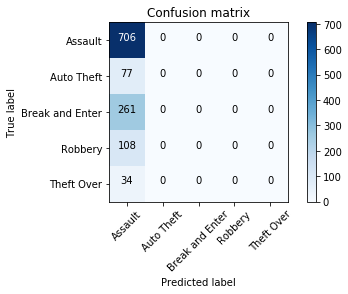

In [136]:
# Compute confusion matrix
LR_cnf_matrix = confusion_matrix(y_test, y_hat_LR)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_cnf_matrix, classes=['Assault','Auto Theft', 'Break and Enter','Robbery','Theft Over'],normalize= False,  title='Confusion matrix')

### Neural Network

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
from sklearn.neural_network import MLPClassifier

In [140]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [141]:
mlp.fit(X_train,y_train)

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [142]:
y_hat_mlp = mlp.predict(X_test)

C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lujing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

        Assault       0.60      1.00      0.75       706
     Auto Theft       0.00      0.00      0.00        77
Break and Enter       0.00      0.00      0.00       261
        Robbery       0.00      0.00      0.00       108
     Theft Over       0.00      0.00      0.00        34

      micro avg       0.60      0.60      0.60      1186
      macro avg       0.12      0.20      0.15      1186
   weighted avg       0.35      0.60      0.44      1186

Confusion matrix, without normalization
[[706   0   0   0   0]
 [ 77   0   0   0   0]
 [261   0   0   0   0]
 [108   0   0   0   0]
 [ 34   0   0   0   0]]


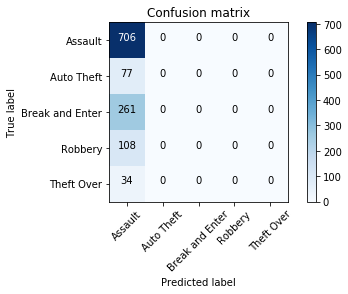

In [143]:
# Compute confusion matrix
mlp_cnf_matrix = confusion_matrix(y_test, y_hat_mlp)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_cnf_matrix, classes=['Assault','Auto Theft', 'Break and Enter','Robbery','Theft Over'],normalize= False,  title='Confusion matrix')

### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train.values.ravel())

y_pred_RF=RF.predict(X_test)

In [145]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.6214165261382799


In [146]:
X_all.columns

Index(['occyear', 'occmonth', 'occday', 'occhour', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'Airport', 'Airport Lounge',
       'American Restaurant',
       ...
       'Venue value counts', 'Apartment', 'Commercial', 'House', 'Other',
       'Outside', 'M4E', 'M5A', 'M6J', 'M6R'],
      dtype='object', length=287)

In [147]:
feature_imp = pd.Series(RF.feature_importances_,index=X_all.columns).sort_values(ascending=False)
feature_imp

occday                   0.264740
occhour                  0.250496
occmonth                 0.206828
occyear                  0.128972
Outside                  0.047729
House                    0.028399
Commercial               0.024202
Apartment                0.024179
Other                    0.011548
Gym / Fitness Center     0.000317
Café                     0.000301
Asian Restaurant         0.000272
Park                     0.000263
Breakfast Spot           0.000262
Pizza Place              0.000255
Restaurant               0.000234
Gym Pool                 0.000226
Cosmetics Shop           0.000225
BBQ Joint                0.000220
Bakery                   0.000210
Pool                     0.000210
Bagel Shop               0.000203
Bar                      0.000191
Korean Restaurant        0.000185
Beach                    0.000181
Pub                      0.000179
Food Truck               0.000177
Coffee Shop              0.000176
Spa                      0.000166
Art Gallery   

No handles with labels found to put in legend.


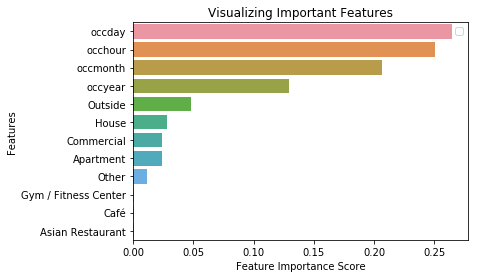

In [148]:
sns.barplot(x=feature_imp[0:12], y=feature_imp.index[0:12])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()